In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [6]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='sex', ylabel='age'>

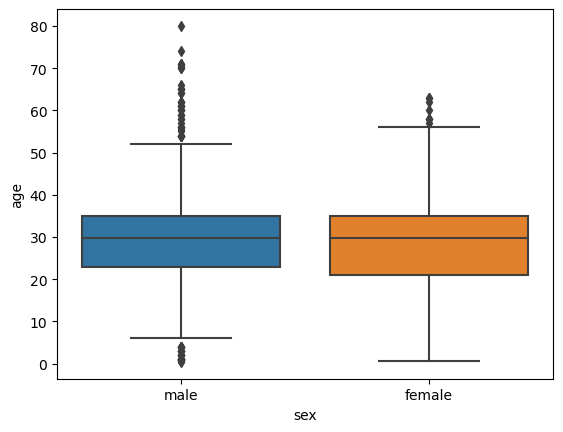

In [8]:
sns.boxplot(x="sex",y="age", data=df)

In [28]:
df['age'].describe()
#we can use this for iqr q1, q2,q3

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

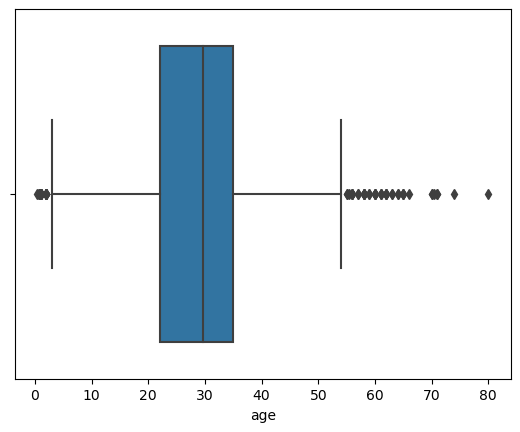

In [10]:
sns.boxplot(x=df['age'])

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


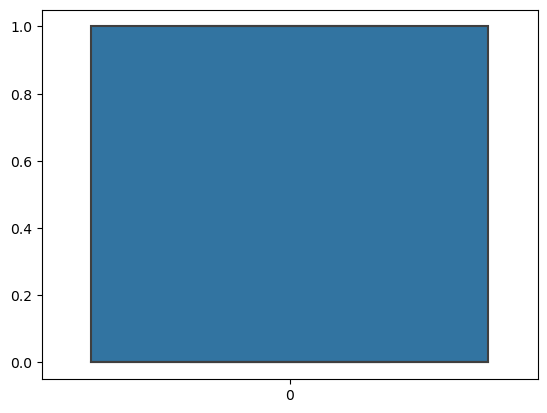

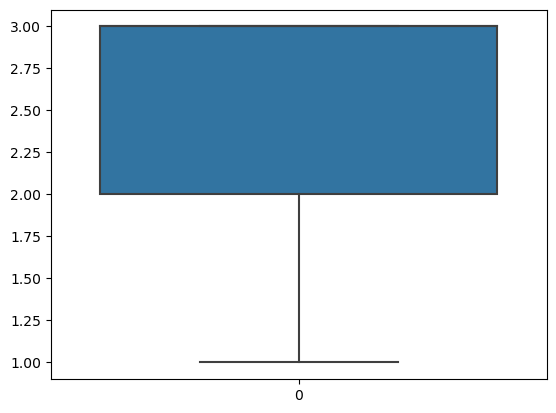

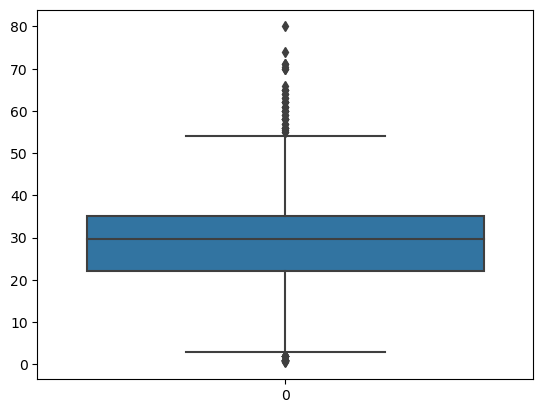

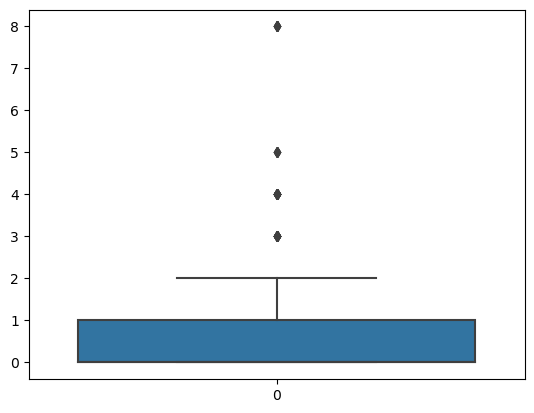

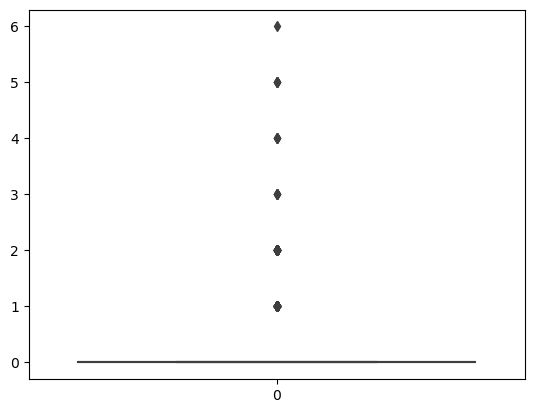

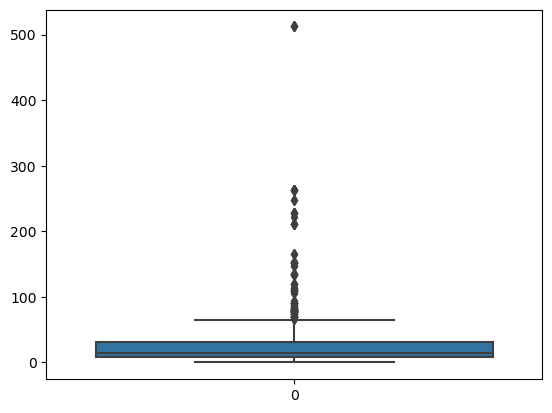

In [11]:
numeric_columns = df.select_dtypes(include='number').columns
print(numeric_columns)

for i in numeric_columns:
    sns.boxplot(df[i])
    plt.show()

In [12]:
q1=np.percentile(df['age'],df['age'].min(),interpolation='midpoint')
q3=np.percentile(df['age'],df['age'].max(),interpolation='midpoint')

/var/folders/0z/7r5mfgf17ps9bpcxnv7tqlgm0000gn/T/ipykernel_25342/361225542.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1=np.percentile(df['age'],df['age'].min(),interpolation='midpoint')
/var/folders/0z/7r5mfgf17ps9bpcxnv7tqlgm0000gn/T/ipykernel_25342/361225542.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q3=np.percentile(df['age'],df['age'].max(),interpolation='midpoint')


In [13]:
iqr=q3-q1
u=q3+1.5*iqr
l=q1-1.5*iqr

In [14]:
print(np.where(df['age']>u))

(array([], dtype=int64),)


In [15]:
print(np.where(df['age']<l))

(array([], dtype=int64),)


<Axes: xlabel='age'>

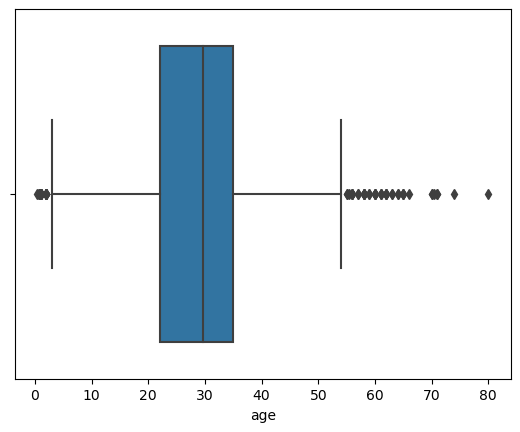

In [16]:
sns.boxplot(x=df['age'])

In [17]:
outliers = df[(df['age'] < l) | (df['age'] > u)]
outliers

Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone]
Index: []

In [18]:
df1 = df[(df['age'] >= l) & (df['age'] <= u)]
df1

survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone  
0     Third    man        True  NaN  Southampton    no  False  
1     First  woman       False    C    Cherbourg   yes  False  
2     Third  woman       False  NaN  Southampton   yes   True  
3     First  woman       False    C  Southampton   yes  False  
4     Third    man        True  NaN  Southampton    no   True  
..      ...    ...         ...  ...          ...   ...    ...  
886  Second    man        True  NaN  Southampton    no   True  
887   First  woman       False    B  Southampton   yes   True  
888   Third  woman       False  NaN  Southampton    no  False  
889   First    man        True    C    Cherbourg   yes   True  
890   Third    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

<Axes: >

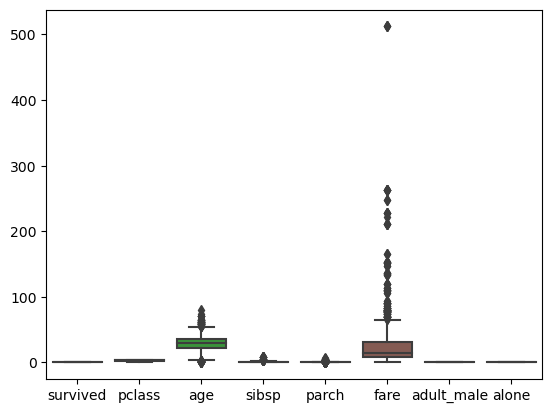

In [19]:
sns.boxplot(data=df1)

<Axes: xlabel='fare'>

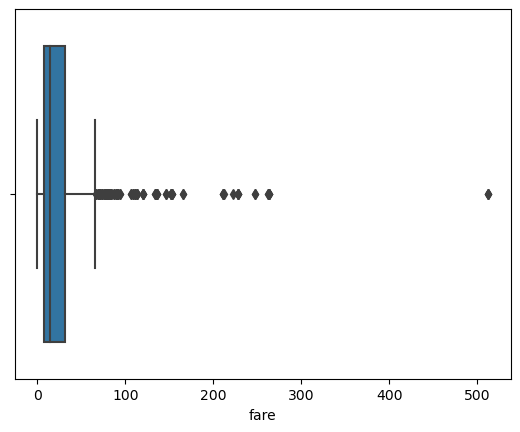

In [20]:
sns.boxplot(x=df["fare"])

In [21]:
print(np.where(df["fare"]>u))

(array([ 27,  31,  88, 118, 195, 215, 258, 268, 269, 297, 299, 305, 306,
       307, 311, 318, 319, 325, 332, 334, 337, 341, 373, 377, 380, 390,
       393, 435, 438, 498, 505, 527, 537, 544, 550, 557, 581, 609, 659,
       660, 679, 689, 698, 700, 708, 716, 730, 737, 742, 763, 779, 802,
       856]),)


In [22]:
print(np.where(df["fare"]<l))

(array([], dtype=int64),)


In [23]:
outliers = df[(df['fare'] < l) | (df['fare'] > u)]
outliers

survived  pclass     sex        age  sibsp  parch      fare embarked  \
27          0       1    male  19.000000      3      2  263.0000        S   
31          1       1  female  29.699118      1      0  146.5208        C   
88          1       1  female  23.000000      3      2  263.0000        S   
118         0       1    male  24.000000      0      1  247.5208        C   
195         1       1  female  58.000000      0      0  146.5208        C   
215         1       1  female  31.000000      1      0  113.2750        C   
258         1       1  female  35.000000      0      0  512.3292        C   
268         1       1  female  58.000000      0      1  153.4625        S   
269         1       1  female  35.000000      0      0  135.6333        S   
297         0       1  female   2.000000      1      2  151.5500        S   
299         1       1  female  50.000000      0      1  247.5208        C   
305         1       1    male   0.920000      1      2  151.5500        S   
306         1       1  female  29.699118      0      0  110.8833        C   
307         1       1  female  17.000000      1      0  108.9000        C   
311         1       1  female  18.000000      2      2  262.3750        C   
318         1       1  female  31.000000      0      2  164.8667        S   
319         1       1  female  40.000000      1      1  134.5000        C   
325         1       1  female  36.000000      0      0  135.6333        C   
332         0       1    male  38.000000      0      1  153.4625        S   
334         1       1  female  29.699118      1      0  133.6500        S   
337         1       1  female  41.000000      0      0  134.5000        C   
341         1       1  female  24.000000      3      2  263.0000        S   
373         0       1    male  22.000000      0      0  135.6333        C   
377         0       1    male  27.000000      0      2  211.5000        C   
380         1       1  female  42.000000      0      0  227.5250        C   
390         1       1    male  36.000000      1      2  120.0000        S   
393         1       1  female  23.000000      1      0  113.2750        C   
435         1       1  female  14.000000      1      2  120.0000        S   
438         0       1    male  64.000000      1      4  263.0000        S   
498         0       1  female  25.000000      1      2  151.5500        S   
505         0       1    male  18.000000      1      0  108.9000        C   
527         0       1    male  29.699118      0      0  221.7792        S   
537         1       1  female  30.000000      0      0  106.4250        C   
544         0       1    male  50.000000      1      0  106.4250        C   
550         1       1    male  17.000000      0      2  110.8833        C   
557         0       1    male  29.699118      0      0  227.5250        C   
581         1       1  female  39.000000      1      1  110.8833        C   
609         1       1  female  40.000000      0      0  153.4625        S   
659         0       1    male  58.000000      0      2  113.2750        C   
660         1       1    male  50.000000      2      0  133.6500        S   
679         1       1    male  36.000000      0      1  512.3292        C   
689         1       1  female  15.000000      0      1  211.3375        S   
698         0       1    male  49.000000      1      1  110.8833        C   
700         1       1  female  18.000000      1      0  227.5250        C   
708         1       1  female  22.000000      0      0  151.5500        S   
716         1       1  female  38.000000      0      0  227.5250        C   
730         1       1  female  29.000000      0      0  211.3375        S   
737         1       1    male  35.000000      0      0  512.3292        C   
742         1       1  female  21.000000      2      2  262.3750        C   
763         1       1  female  36.000000      1      2  120.0000        S   
779         1       1  female  43.000000      0      1  211.3375        S   
8

In [24]:
df2 = df[(df['fare'] >= l) & (df['fare'] <= u)]
df2

survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone  
0     Third    man        True  NaN  Southampton    no  False  
1     First  woman       False    C    Cherbourg   yes  False  
2     Third  woman       False  NaN  Southampton   yes   True  
3     First  woman       False    C  Southampton   yes  False  
4     Third    man        True  NaN  Southampton    no   True  
..      ...    ...         ...  ...          ...   ...    ...  
886  Second    man        True  NaN  Southampton    no   True  
887   First  woman       False    B  Southampton   yes   True  
888   Third  woman       False  NaN  Southampton    no  False  
889   First    man        True    C    Cherbourg   yes   True  
890   Third    man        True  NaN   Queenstown    no   True  

[838 rows x 15 columns]

<Axes: >

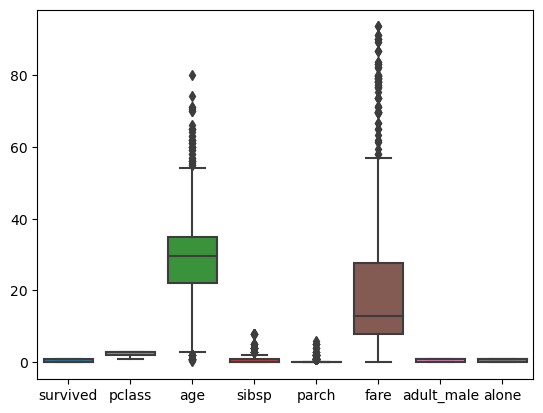

In [25]:
sns.boxplot(data=df2)